## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

**Breakdown of Our Features:**

**STATE:**
51 Unique States name

**Account** **Length:**
Length of The Account

**Area Code:**
Code Number of Area having some States

**International Plan:**
Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan:**
Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages:**
Number of Voice Mail Messages ranging from 0 to 50

**Total day minutes:**
 Total Number of Minutes Spent  in Morning

**Total day calls:**
 Total Number of Calls made  in Morning.

**Total day charge:**
 Total Charge to the Customers in Morning.

**Total eve minutes:**
Total Number of Minutes Spent  in Evening

**Total eve calls:**
 Total Number of Calls made r in Evening.

**Total eve charge:**
 Total Charge to the Customers in Morning.

**Total night minutes:**
 Total Number of Minutes Spent  in the Night.

**Total night calls:**
 Total Number of Calls made  in Night.

**Total night charge:**
 Total Charge to the Customers in Night.

 **Customer service calls**
 Number of customer service calls made by customer

 **Churn**
 Customer Churn, True means churned customer, False means retained customer

In [1]:
# imports libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Telecom Churn.csv")

In [3]:
df.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2179,NM,54,415,No,Yes,24,92.3,88,15.69,193.1,98,16.41,99.3,119,4.47,11.6,3,3.13,2,False
2608,IN,81,408,No,Yes,46,168.3,124,28.61,270.9,103,23.03,222.5,98,10.01,6.7,2,1.81,4,False
546,WI,69,510,Yes,No,0,279.8,90,47.57,248.7,91,21.14,171.0,118,7.69,8.4,10,2.27,2,True
1837,NH,117,510,Yes,No,0,54.2,100,9.21,303.2,84,25.77,171.8,84,7.73,8.6,2,2.32,1,True
935,MD,86,408,No,No,0,226.3,88,38.47,223.0,107,18.96,255.6,92,11.50,13.0,3,3.51,4,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### there is no null value

In [5]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


C:\Users\prade\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


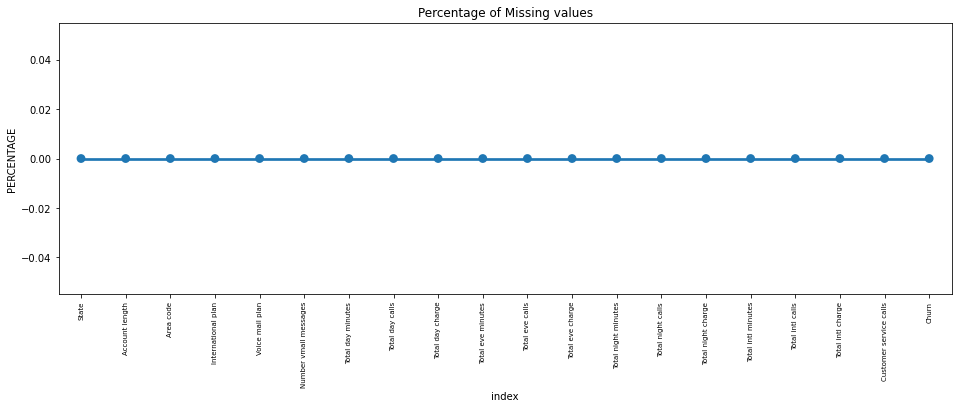

In [6]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Analyzing What The Dependent Variable Said To Us i.e 'CHURN'.

In [7]:
df["Churn"].unique()

array([False,  True])

In [8]:
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


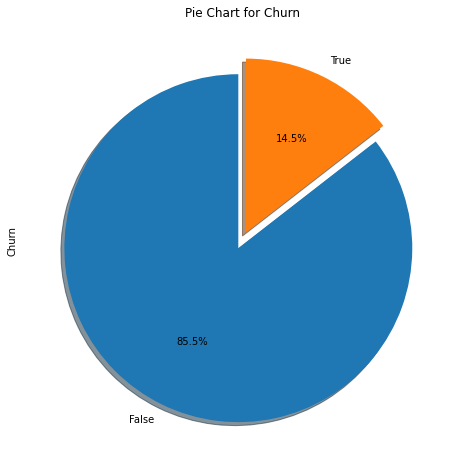

In [9]:
#To get the pie chart to analyze churn
df['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

In [10]:
#printing the unique value of sate column
df['State'].nunique()

51

In [11]:
state_data = pd.crosstab(df["State"],df["Churn"])

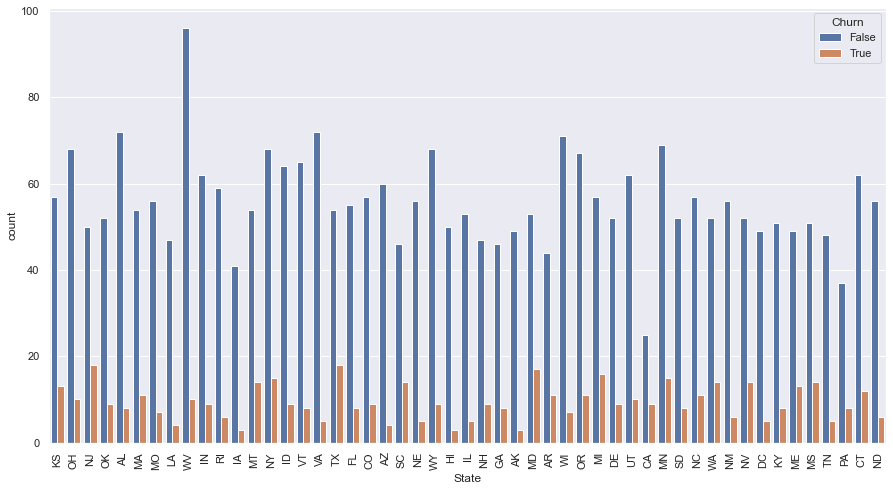

In [12]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(x='State', hue="Churn", data=df)
plt.xticks(rotation=90)
plt.show()

In [13]:
state_data["Churn Percentage"] = state_data.apply(lambda x: np.round((x[1]*100)/(x[0]+x[1]),2),axis=1)

In [14]:
state_data

Churn,False,True,Churn Percentage
State,,,
AK,49,3,5.77
AL,72,8,10.00
AR,44,11,20.00
AZ,60,4,6.25
CA,25,9,26.47
CO,57,9,13.64
CT,62,12,16.22
DC,49,5,9.26
DE,52,9,14.75


In [15]:
#show the most churn state of top 10 by ascending the above list
df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

## Analyzing "Area Code" column

In [16]:
df["Area code"].nunique()

3

In [17]:
## churn value by area code
pd.crosstab(df["Area code"],df["Churn"])

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


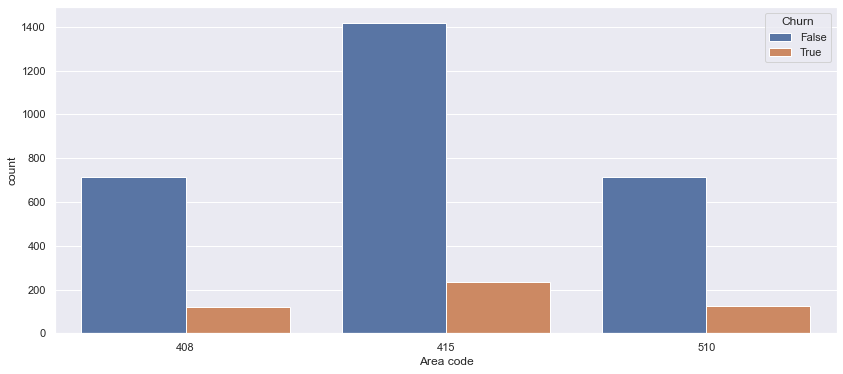

In [18]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x="Area code",hue="Churn")
plt.show()

## Analyzing "Account Length" column

In [19]:
#Separating churn and non churn customers
churn_df     = df[df["Churn"] == bool(True)]
not_churn_df = df[df["Churn"] == bool(False)]

C:\Users\prade\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Account length', ylabel='Density'>

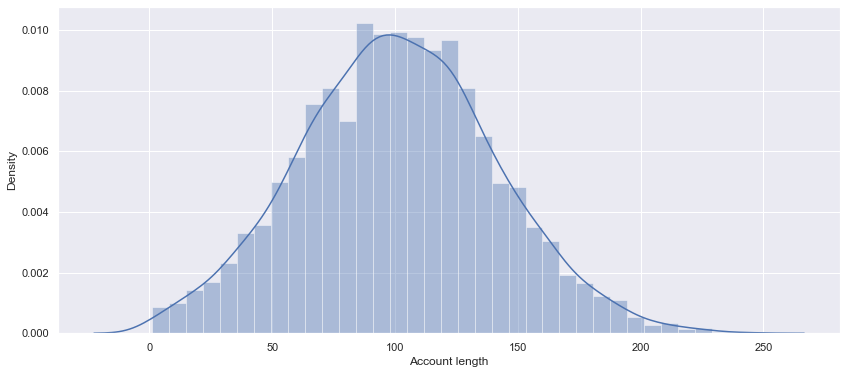

In [20]:
#Account length vs Churn
plt.figure(figsize=(14,6))
sns.distplot(df['Account length'])

C:\Users\prade\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prade\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\prade\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

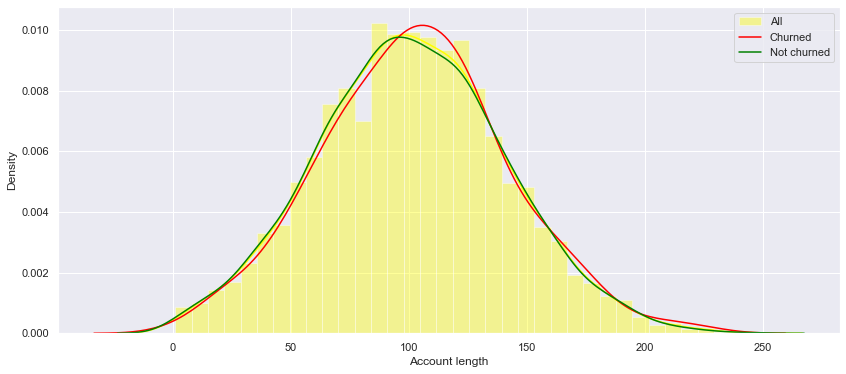

In [21]:
#comparison of churned account length and not churned account length 
plt.figure(figsize=(14,6))
sns.distplot(df['Account length'],color = 'yellow',label="All")
sns.distplot(churn_df['Account length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df['Account length'],color = 'green',hist= False,label="Not churned")
plt.legend()

## Analyzing "International Plan" column

In [22]:
df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
pd.crosstab(df["International plan"],df["Churn"])

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


<AxesSubplot:xlabel='International plan', ylabel='count'>

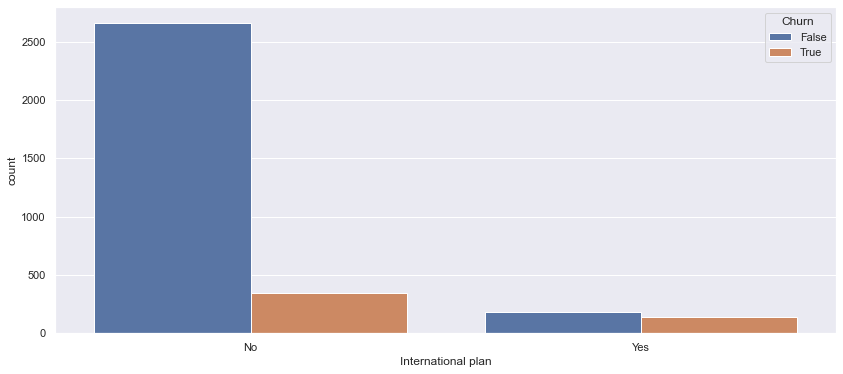

In [24]:
#Analysing by using countplot
plt.figure(figsize=(14,6))
sns.countplot(x='International plan',hue="Churn",data = df)

## Analyzing "Voice Mail Plan" column

In [25]:
#show the unique value of the "Voice mail plan" column
df["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
#Calculate the Voice Mail Plan vs Churn percentage
Voice_mail_plan_data = pd.crosstab(df["Voice mail plan"],df["Churn"])
Voice_mail_plan_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

Churn            False  True  Percentage Churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

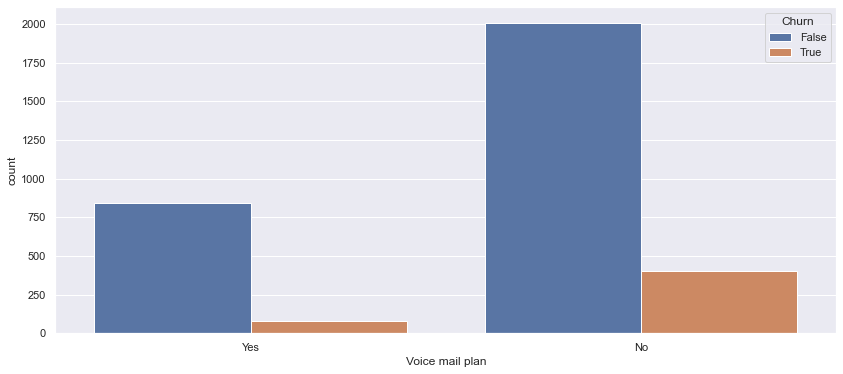

In [27]:
#Analysing by using countplot
plt.figure(figsize=(14,6))
sns.countplot(x='Voice mail plan',hue="Churn",data = df)

## Analyzing "Number vmail messages" column

In [28]:
#show the data of 'Number vmail messages' 
df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9], dtype=int64)

In [29]:
#Printing the data of 'Number vmail messages'
df['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number vmail messages, dtype: int64

In [30]:
#Show the details of 'Number vmail messages' data
df['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

C:\Users\prade\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number vmail messages', ylabel='Density'>

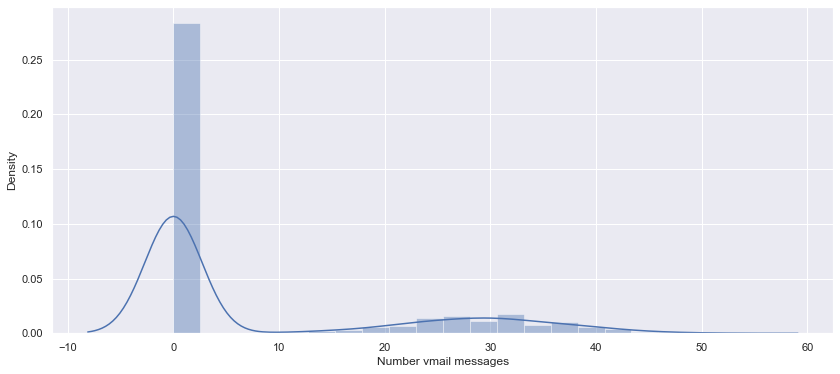

In [31]:
#Analysing by using displot diagram
plt.figure(figsize=(14,6))
sns.distplot(df['Number vmail messages'])

## Analyzing "Customer service calls" column

In [32]:
#Printing the data of customer service calls 
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [33]:
#Calculating the Customer service calls vs Churn percentage
Customer_service_calls_data = pd.crosstab(df['Customer service calls'],df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

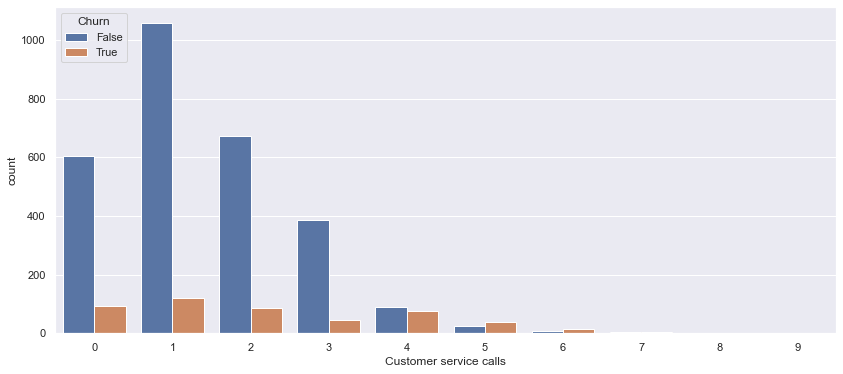

In [34]:
#Analysing using countplot
plt.figure(figsize=(14,6))
sns.countplot(x='Customer service calls',hue="Churn",data = df)

## Analyzing all calls minutes,all calls, all calls charge together

In [35]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total day calls'].mean())

Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64


In [36]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total day minutes'].mean())

Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64


In [37]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total day charge'].mean())

Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64


<AxesSubplot:xlabel='Total day minutes', ylabel='Total day charge'>

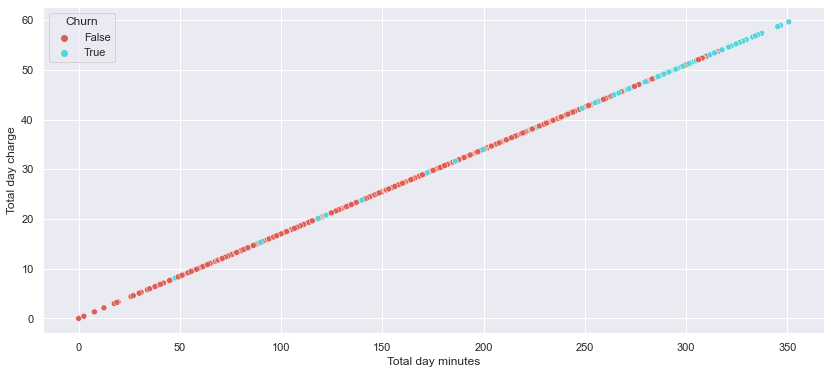

In [38]:
#show the relation using scatter plot
plt.figure(figsize=(14,6))
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=df,palette='hls')

In [39]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total eve calls'].mean())

Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64


In [40]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total eve minutes'].mean())

Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64


In [41]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total eve charge'].mean())

Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64


<AxesSubplot:xlabel='Total eve minutes', ylabel='Total eve charge'>

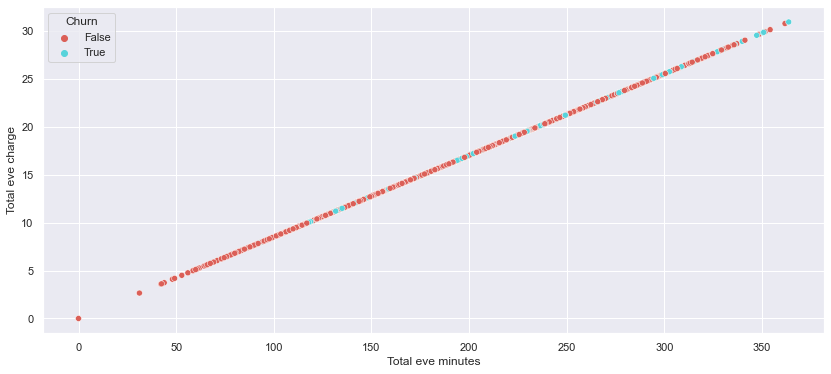

In [43]:
#show the relation using scatter plot
plt.figure(figsize=(14,6))
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=df,palette='hls')

In [44]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total night calls'].mean())

Churn
False    100.058246
True     100.399586
Name: Total night calls, dtype: float64


In [45]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total night charge'].mean())

Churn
False    9.006074
True     9.235528
Name: Total night charge, dtype: float64


In [46]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total night minutes'].mean())

Churn
False    200.133193
True     205.231677
Name: Total night minutes, dtype: float64


<AxesSubplot:xlabel='Total night minutes', ylabel='Total night charge'>

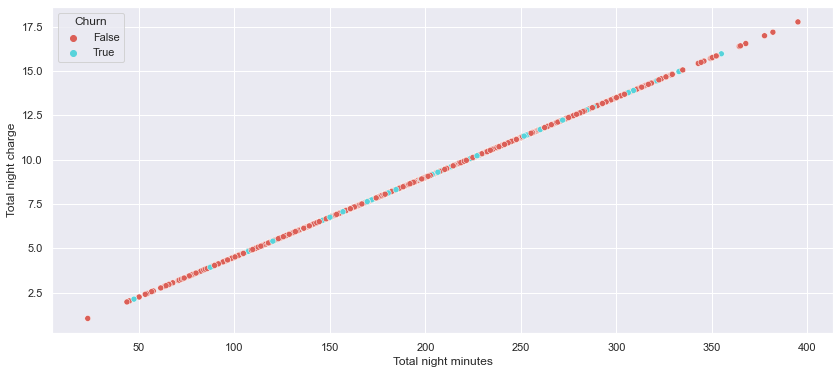

In [48]:
#show the relation using scatter plot
plt.figure(figsize=(14,6))
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=df,palette='hls')

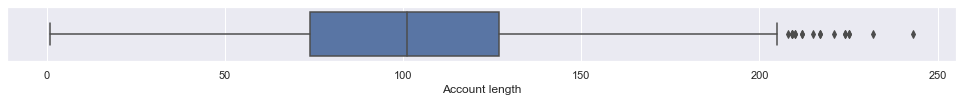

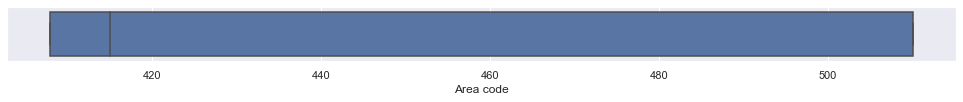

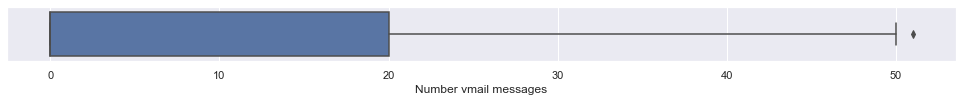

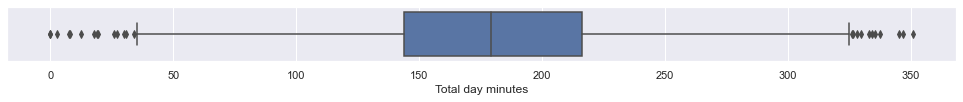

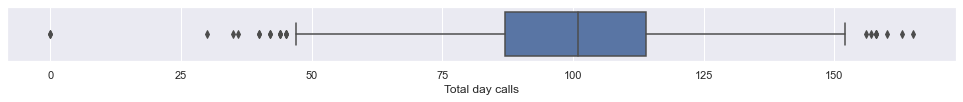

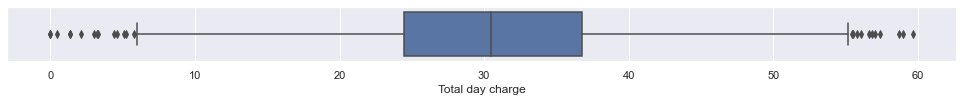

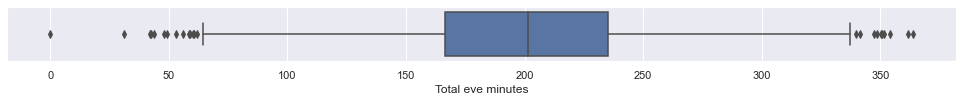

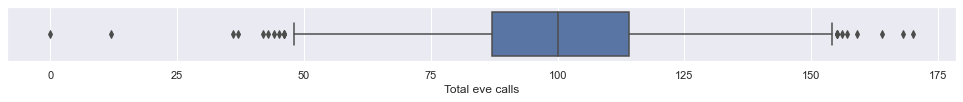

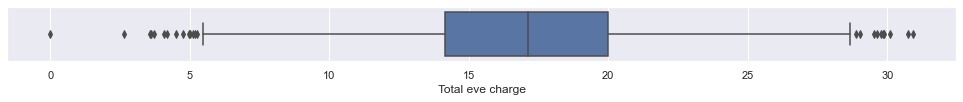

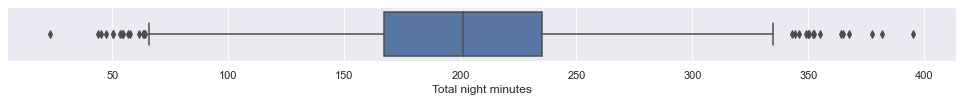

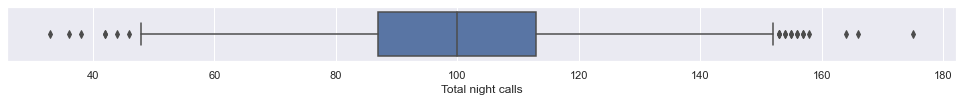

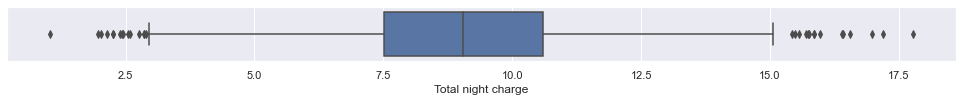

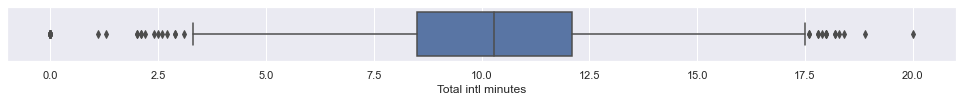

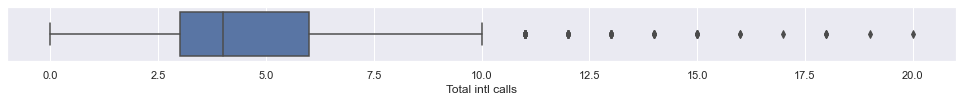

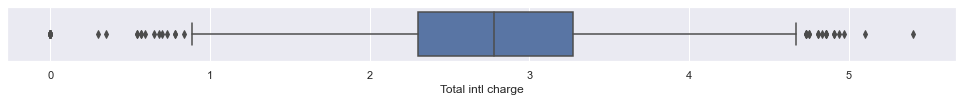

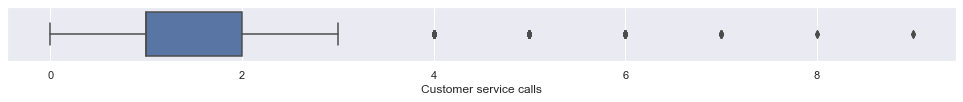

In [49]:
#Printing boxplot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

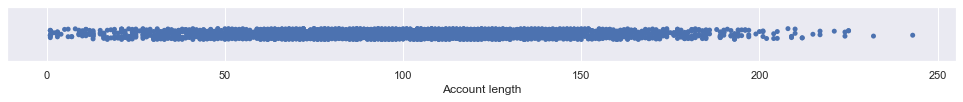

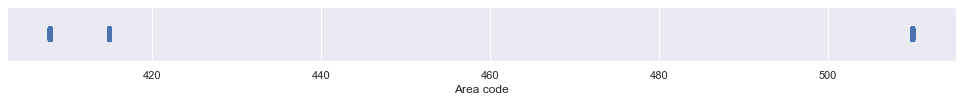

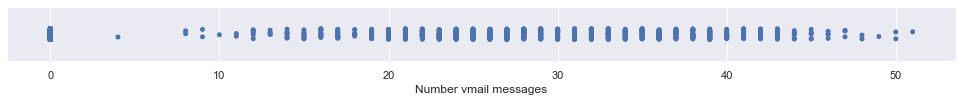

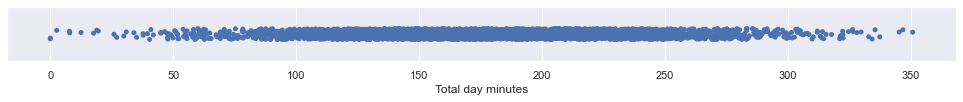

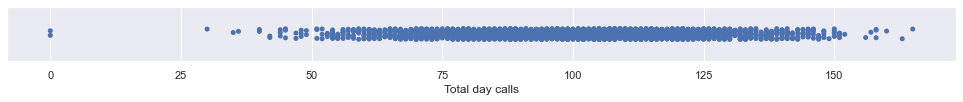

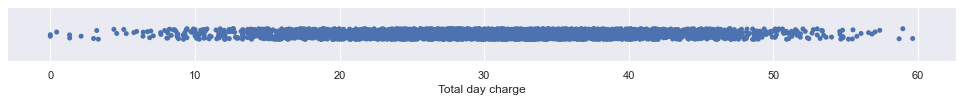

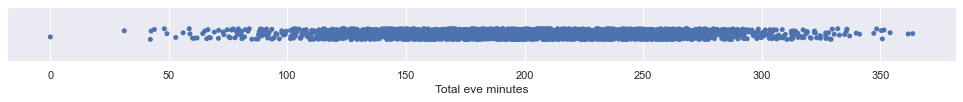

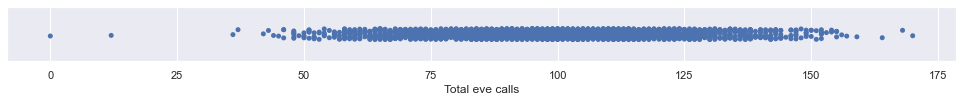

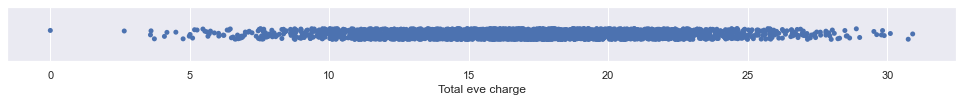

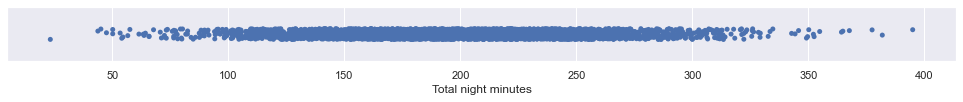

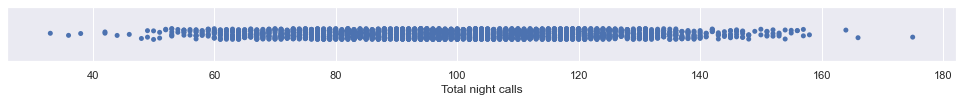

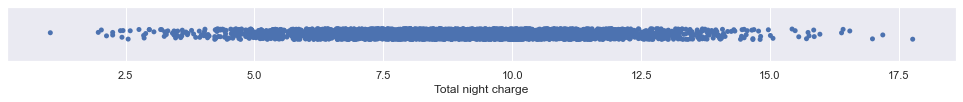

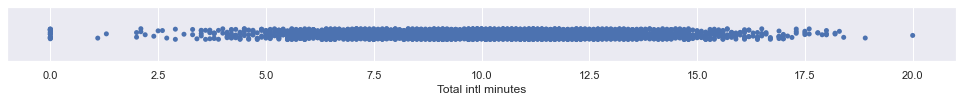

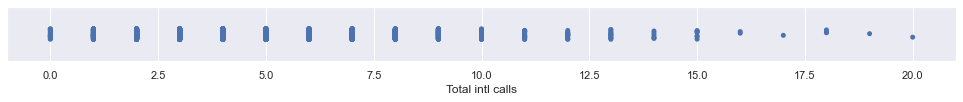

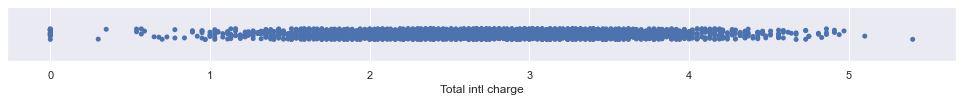

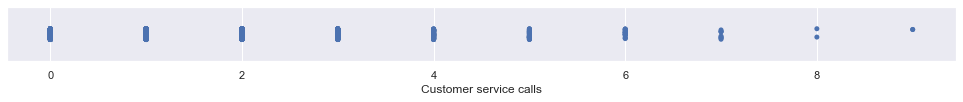

In [50]:
#Printing strip plot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

<AxesSubplot:>

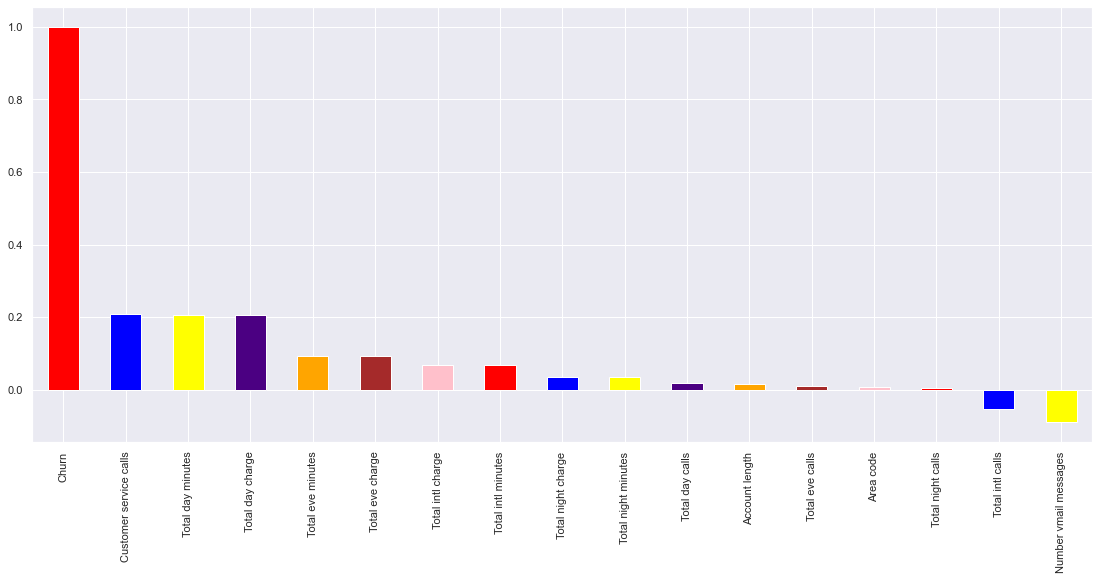

In [51]:
# visualization using correlation plot
plt.figure(figsize=(19,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color = ['red','blue','yellow','indigo','orange','brown','pink'])